In [1]:
#1.-Extract Data and Loading Data
#2.-Undestand the data: statistics(Describe()) info() shape
#3.-EDA (Univariate Analysis and bivariate analysis)
#4.-Data Wrangling
#4.1-Missing Data Imputation - Outlet_Size
#4.2 Missing Data Imputation - Item_Weight
#5.-Feature engineering}
#6.-Feature Transformation

# Extract Data and Loading Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bigtrain.csv")

# Undestand the data: statistics(Describe()) info() shape

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Object: Object format means variables are categorical. <br>
Float64: It represents the variable which have some decimal values. They are also numerical variables 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.shape

(8523, 12)

In [9]:
def corr(df):
    df = df.corr()['Item_Outlet_Sales'].sort_values()    
    return df

corr(df)

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

# Univariate Analysis

# Target Variable

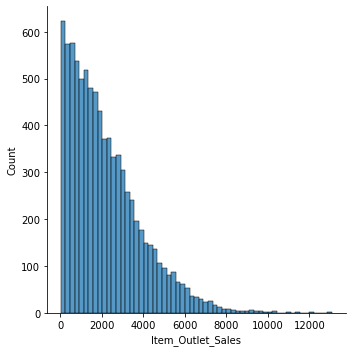

In [10]:
sns.displot(df['Item_Outlet_Sales']);

<AxesSubplot:>

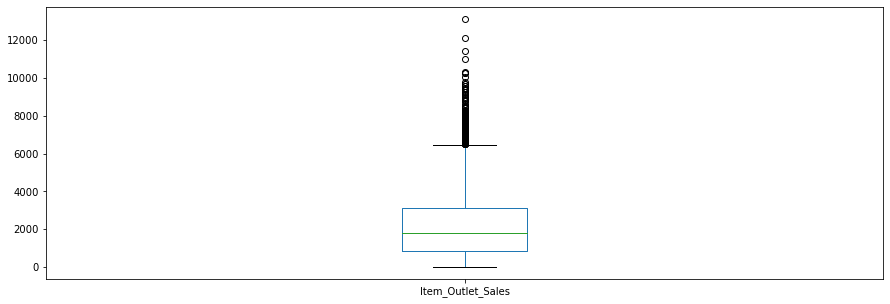

In [11]:
df['Item_Outlet_Sales'].plot.box(figsize=(15,5))

# Independent Variable (Categorical)

is one that has two or more categories, but there is no intrinsic ordering to the categories

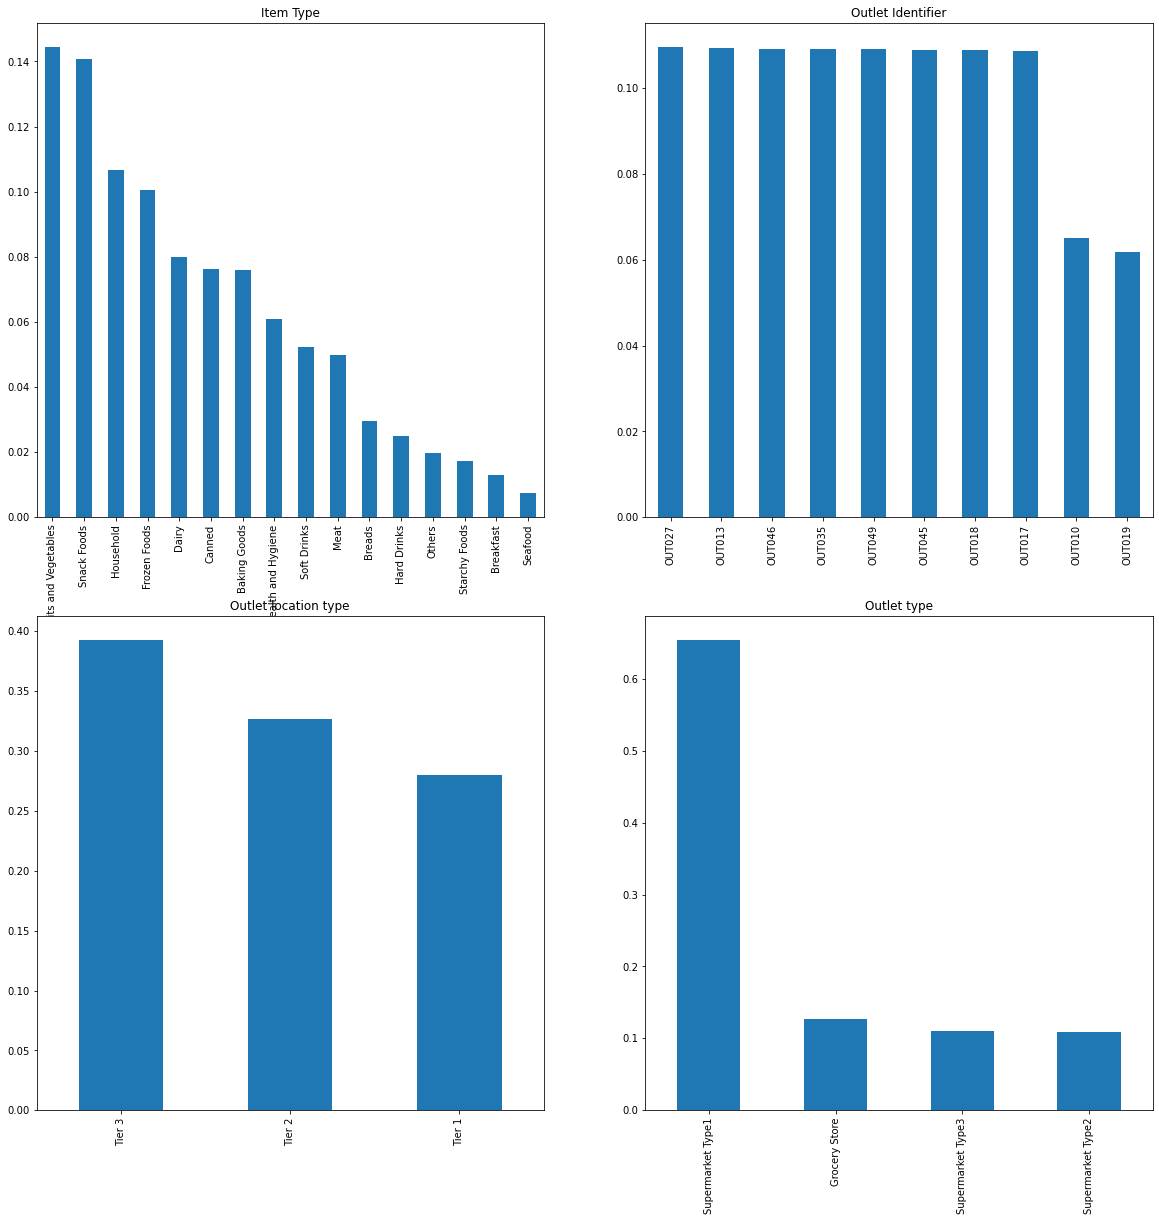

In [12]:
plt.figure(1) 
plt.subplot(221)
status_vals1 = pd.Series(df['Item_Type'].value_counts()) 
(status_vals1/df.shape[0]).plot(kind="bar",title="Item Type", figsize=(20,20))
plt.subplot(222)
status_vals2 = pd.Series(df['Outlet_Identifier'].value_counts()) 
(status_vals2/df.shape[0]).plot(kind="bar",title="Outlet Identifier")

plt.subplot(223)
val1 = pd.Series(df["Outlet_Location_Type"].value_counts())
(val1 /df.shape[0]).plot(kind='bar',title="Outlet location type")

plt.subplot(224)
val2 = pd.Series(df["Outlet_Type"].value_counts())
(val2 /df.shape[0]).plot(kind='bar',title="Outlet type")

plt.show()

# Independet variable(Ordinal)

An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories.

<AxesSubplot:title={'center':'Outlet Size'}>

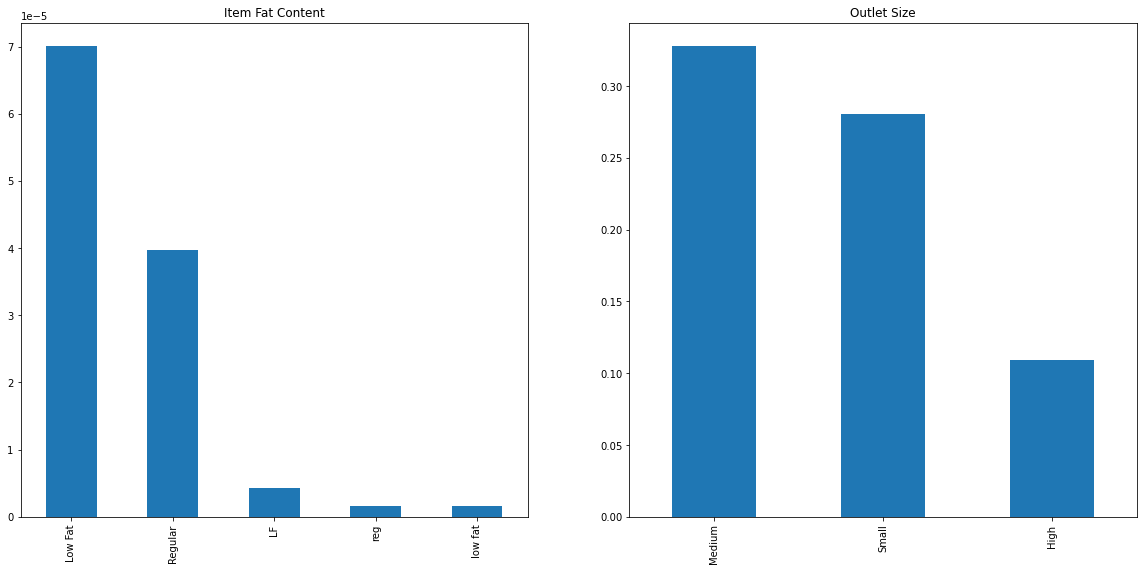

In [13]:
plt.figure(1) 
plt.subplot(221) 
status_vals = pd.Series(df['Item_Fat_Content'].value_counts(normalize=True)) 
(status_vals/df.shape[0]).plot(kind="bar",title="Item Fat Content",figsize=(20,20))

plt.subplot(222)
status_vals2 = pd.Series(df['Outlet_Size'].value_counts()) 
(status_vals2/df.shape[0]).plot(kind="bar", title="Outlet Size")

# Independient variable(Numerical)

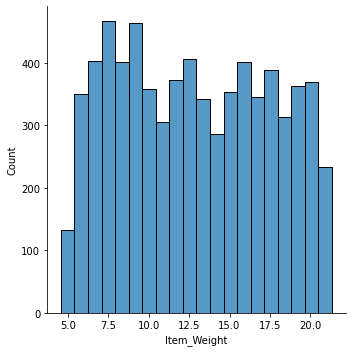

In [14]:
sns.displot(df['Item_Weight']);

# Corr variable numerical

In [22]:
numeric_variables = df.select_dtypes(include=[np.number])
#corr
corr = numeric_variables.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [23]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


# Possibility of Outlier data

<AxesSubplot:>

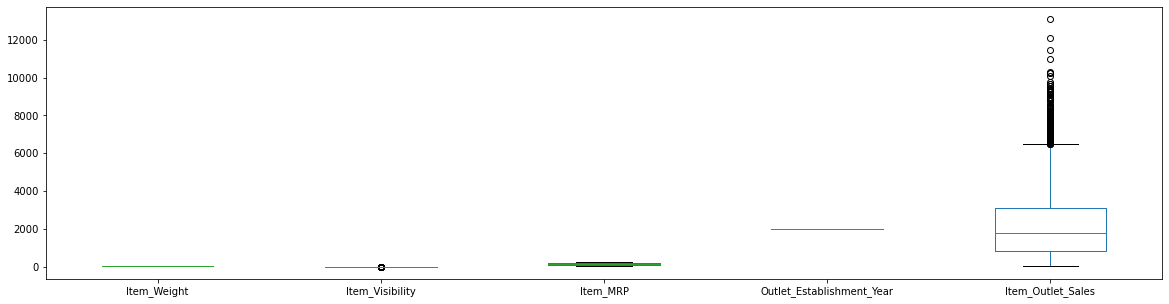

In [16]:
df.plot(kind='box',figsize=(20,5))

# Bivariate Analysis

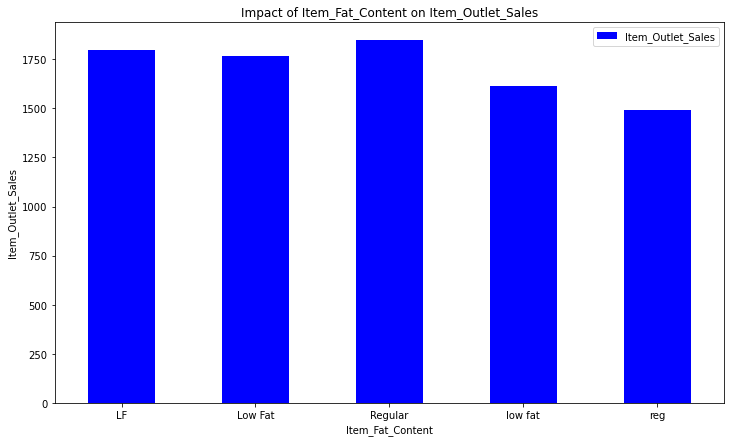

In [29]:
Item_Fat_Content_pivot = \
df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [30]:
df.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [31]:
df.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


# Data Wrangling

It is important to understand what values your data set contains and to see if there are any weird or missing values hidden somewhere in our table

                      Total   Percent
Outlet_Size            2410  0.282764
Item_Weight            1463  0.171653
Item_Outlet_Sales         0  0.000000
Outlet_Type               0  0.000000
Outlet_Location_Type      0  0.000000


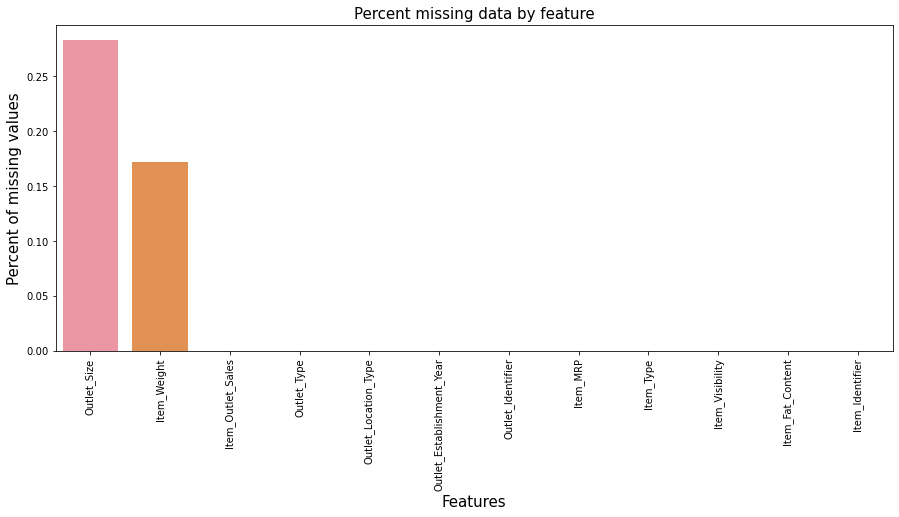

In [32]:
def distribution_of_missingValues(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missingData = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missingData.index, y=missingData['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return missingData.head()

print(distribution_of_missingValues(df))

# Missing Data Imputation - Outlet_Size

This variable is ordinal variable.

In [36]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Missing Data Imputation - Item_Weight

Numerical data

In [37]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

                           Total  Percent
Item_Outlet_Sales              0      0.0
Outlet_Type                    0      0.0
Outlet_Location_Type           0      0.0
Outlet_Size                    0      0.0
Outlet_Establishment_Year      0      0.0


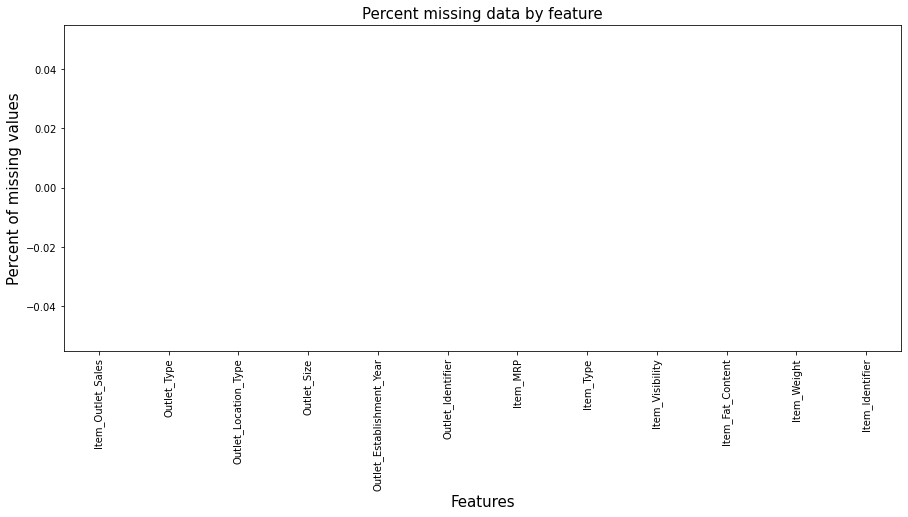

In [38]:
print(distribution_of_missingValues(df))

# Feature engineering

In [46]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [56]:
#Remember the data is from 2013
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [57]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})

# Feature Transformation

In [61]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
df.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Outlet_Years                           int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_

# Export files as modified versions

In [62]:
df.to_csv("train_modified.csv",index=False)